<a href="https://colab.research.google.com/github/cicbeast/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [0]:
import numpy as np

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [106]:
# Let's take a look at our dataframes
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [107]:
cell_phones.shape

(9215, 3)

In [108]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [109]:
population.shape

(59297, 3)

In [110]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.5,18.5,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [111]:
# Alex's trick
geo_country_codes.head().T

,0,1,2,3,4
geo,abkh,abw,afg,ago,aia
alt_5,NaN,NaN,NaN,NaN,NaN
alternative_1,NaN,NaN,Islamic Republic of Afghanistan,NaN,NaN
alternative_2,NaN,NaN,NaN,NaN,NaN
alternative_3,NaN,NaN,NaN,NaN,NaN
alternative_4_cdiac,NaN,Aruba,Afghanistan,Angola,NaN
arb1,NaN,NaN,NaN,NaN,NaN
arb2,NaN,NaN,NaN,NaN,NaN
arb3,NaN,NaN,NaN,NaN,NaN
arb4,NaN,NaN,NaN,NaN,NaN


In [112]:
geo_country_codes.shape

(273, 33)

In [113]:
# We can merge as there are 2 common columns
# Pandas will merge on them without being told to as they have the same names
cell_pop = pd.merge(cell_phones, population)
cell_pop.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


In [114]:
# Let's double check
cell_pop.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [115]:
# Let's take a look at the columns we want to merge
geo_country_codes[['geo', 'country']].head()

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [116]:
# Now let's merge again
# As geo is the common column, no additional instructions should be needed
cell_pop_geo = pd.merge(cell_pop, geo_country_codes[['geo', 'country']])
cell_pop_geo.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


In [117]:
# And to double check again
cell_pop_geo.shape

(8590, 5)

***Optional bonus for Part 1: Take initiative to join more data.***

In [118]:
# I like to have the world regions in the dataframes
df1 = pd.merge(cell_pop, geo_country_codes[['geo', 'country', 'world_4region', 'world_6region']])
df1.sample(10)

,geo,time,cell_phones_total,population_total,country,world_4region,world_6region
2933,gin,1995,950.0,7871173,Guinea,africa,sub_saharan_africa
8004,ukr,1976,0.0,49036456,Ukraine,europe,europe_central_asia
5718,nga,1987,0.0,88101628,Nigeria,africa,sub_saharan_africa
2100,dma,1981,0.0,75375,Dominica,americas,america
248,arg,2000,"6,487,950.0",37057452,Argentina,americas,america
5469,mrt,2013,"3,988,195.0",3946170,Mauritania,africa,sub_saharan_africa
8202,vct,1994,150.0,108129,St. Vincent and the Grenadines,americas,america
412,aut,1987,"26,223.0",7639352,Austria,europe,europe_central_asia
3244,guy,1988,0.0,750731,Guyana,americas,america
7881,tuv,1989,0.0,8947,Tuvalu,asia,east_asia_pacific


In [119]:
df1.shape

(8590, 7)

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [120]:
# Cell phones per person would be found by dividing cell_phones_total by population for every row
# Let's take a look at the test case, US in 2017
US = cell_pop_geo[cell_pop_geo['geo'] == 'usa']
US[US['time'] == 2017]

,geo,time,cell_phones_total,population_total,country
8134,usa,2017,"395,881,000.0",324459463,United States


In [121]:
395881000/324459463

1.2201246847283354

In [0]:
# Confirmed
# Now let's do that division over the whole dataframe
# First a simplification"
df = cell_pop_geo


In [123]:
# Now we create a new column by dividing two existing columns
df['cell/person'] = df['cell_phones_total']/df['population_total']
df.head()

,geo,time,cell_phones_total,population_total,country,cell/person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [124]:
# Now we check the US in 2017 again
US = df[df['geo'] == 'usa']
US[US['time'] == 2017]

,geo,time,cell_phones_total,population_total,country,cell/person
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [125]:
# And now lets make the geo column all caps with str.upper()
df['geo'] = df['geo'].str.upper()
df.head()

,geo,time,cell_phones_total,population_total,country,cell/person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


***Optional bonus for Part 2: Take initiative to make more features.***

In [126]:
# Let's make a has_cell_phones column that is Boolean
df['has_cell_phones'] = df['cell_phones_total'] > 0
df.sample(5)

,geo,time,cell_phones_total,population_total,country,cell/person,has_cell_phones
6469,PRY,2002,"1,667,018.0",5508611,Paraguay,0.3026203883338286,True
6757,SEN,1960,0.0,3206749,Senegal,0.0,False
4220,KIR,2017,"46,123.0",116398,Kiribati,0.3962525129297754,True
3275,HKG,1965,0.0,3489213,"Hong Kong, China",0.0,False
33,AFG,2005,"1,200,000.0",25070798,Afghanistan,0.047864451701936254,True


In [127]:
# And we'll rearrange it so it flows a bit better
df = df[['geo', 'time', 'has_cell_phones', 'cell_phones_total', 'population_total', 'cell/person', 'country']]
df.sample(5)

,geo,time,has_cell_phones,cell_phones_total,population_total,cell/person,country
1013,BOL,1992,True,"1,551.0",7131707,0.00021747948983321945,Bolivia
2036,DEU,2009,True,"105,000,000.0",80965612,1.2968468638265835,Germany
21,AFG,1993,False,0.0,15095099,0.0,Afghanistan
3324,HND,1976,False,0.0,3251158,0.0,Honduras
1531,CIV,2006,True,"4,065,421.0",18699435,0.21740876128075529,Cote d'Ivoire


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [128]:
# Let's describe df for numeric columns
# describe() does this by default
df.describe()

,time,cell_phones_total,population_total,cell/person
count,"8,590.0","8,590.0","8,590.0","8,590.0"
mean,"1,994.1934807916182","9,004,949.642905472","29,838,230.581722934",0.2796385558059151
std,14.257974607310302,"55,734,084.872179635","116,128,377.47477299",0.454246656214052
min,"1,960.0",0.0,"4,433.0",0.0
25%,"1,983.0",0.0,"1,456,148.0",0.0
50%,"1,995.0","6,200.0","5,725,062.5",0.0015636266438163813
75%,"2,006.0","1,697,652.0","18,105,812.0",0.4611491855201403
max,"2,017.0","1,474,097,000.0","1,409,517,397.0",2.490242818521353


In [129]:
# Now let's describe for non-numeric columns
df.describe(include=np.object)

,geo,country
count,8590,8590
unique,195,195
top,KGZ,Slovenia
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [130]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

#First let's isolate the year 2017
now = df[df['time'] == 2017]
now.head()


,geo,time,has_cell_phones,cell_phones_total,population_total,cell/person,country
45,AFG,2017,True,"23,929,713.0",35530081,0.6735057260353557,Afghanistan
91,AGO,2017,True,"13,323,952.0",29784193,0.4473497737541521,Angola
137,ALB,2017,True,"3,497,950.0",2930187,1.19376340144844,Albania
183,AND,2017,True,"80,337.0",76965,1.0438121223932957,Andorra
219,ARE,2017,True,"19,826,224.0",9400145,2.109140231347495,United Arab Emirates


In [131]:
# Now let's sort by cell_phones_total, and we need it in descending order
now.sort_values('cell_phones_total', ascending=False).head()

,geo,time,has_cell_phones,cell_phones_total,population_total,cell/person,country
1496,CHN,2017,True,"1,474,097,000.0",1409517397,1.0458168186766978,China
3595,IND,2017,True,"1,168,902,277.0",1339180127,0.8728491809526382,India
3549,IDN,2017,True,"458,923,202.0",263991379,1.738402230172827,Indonesia
8134,USA,2017,True,"395,881,000.0",324459463,1.2201246847283354,United States
1084,BRA,2017,True,"236,488,548.0",209288278,1.1299655683535224,Brazil


In [132]:
# And just so that it looks like it does in the question
nowtop5 = now.sort_values('cell_phones_total', ascending=False).head()
nowtop5[['country', 'cell_phones_total']]

,country,cell_phones_total
1496,China,"1,474,097,000.0"
3595,India,"1,168,902,277.0"
3549,Indonesia,"458,923,202.0"
8134,United States,"395,881,000.0"
1084,Brazil,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [133]:
# Let's find out
US = df[df['geo'] == 'USA']
# We have to compare population to cell phones, then sort on time, then get the earliest value
US[US['population_total'] < US['cell_phones_total']].sort_values('time').head(1)

,geo,time,has_cell_phones,cell_phones_total,population_total,cell/person,country
8131,USA,2014,True,"355,500,000.0",317718779,1.118914031833164,United States


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

In [134]:
# Let's find the country with the biggest cell/person values in the last 3 years of data
df.head()


,geo,time,has_cell_phones,cell_phones_total,population_total,cell/person,country
0,AFG,1960,False,0.0,8996351,0.0,Afghanistan
1,AFG,1965,False,0.0,9938414,0.0,Afghanistan
2,AFG,1970,False,0.0,11126123,0.0,Afghanistan
3,AFG,1975,False,0.0,12590286,0.0,Afghanistan
4,AFG,1976,False,0.0,12840299,0.0,Afghanistan


In [0]:
# First we'll isolate those years
yr2017 = df[df['time'] == 2017]
yr2016 = df[df['time'] == 2016]
yr2015 = df[df['time'] == 2015]

In [136]:
# Next we use sort_values to find the highest values for cell/person
# First 2017
yr2017.sort_values('cell/person', ascending=False).head(1)

,geo,time,has_cell_phones,cell_phones_total,population_total,cell/person,country
3319,HKG,2017,True,"18,340,347.0",7364883,2.490242818521353,"Hong Kong, China"


In [137]:
# 2016
yr2016.sort_values('cell/person', ascending=False).head(1)

,geo,time,has_cell_phones,cell_phones_total,population_total,cell/person,country
3318,HKG,2016,True,"17,584,969.0",7302843,2.4079620772348522,"Hong Kong, China"


In [138]:
# 2015
yr2015.sort_values('cell/person', ascending=False).head(1)

,geo,time,has_cell_phones,cell_phones_total,population_total,cell/person,country
3317,HKG,2015,True,"16,724,440.0",7245701,2.3081879862279715,"Hong Kong, China"


In [139]:
# We can also find out the other end of the spectrum, lowest cell/person for those years
# 2017
(yr2017.sort_values('cell/person').head(1))

,geo,time,has_cell_phones,cell_phones_total,population_total,cell/person,country
7072,SSD,2017,True,"1,511,529.0",12575714,0.12019428876960783,South Sudan


In [140]:
# 2016
yr2016.sort_values('cell/person').head(1)

,geo,time,has_cell_phones,cell_phones_total,population_total,cell/person,country
2407,ERI,2016,True,"506,000.0",4954645,0.10212638846980965,Eritrea


In [141]:
yr2015.sort_values('cell/person').head(1)

,geo,time,has_cell_phones,cell_phones_total,population_total,cell/person,country
2406,ERI,2015,True,"475,000.0",4846976,0.09799924736578024,Eritrea


### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [143]:
# Let's take a look
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [144]:
# Let's crosstab year and occupation
pd.crosstab(df['Year'], df['Occupation'])

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,150,2,11,3
2000,125,14,21,9
2001,114,6,31,6
2002,99,11,42,7
2003,93,17,41,15
2004,63,37,45,19
2005,60,26,54,22
2006,58,31,47,25
2007,36,24,47,34


In [145]:
# Now let's normalize the rows so that we can get the percentages for each year
pd.crosstab(df['Year'], df['Occupation'], normalize='index')

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253
2004,0.38414634146341464,0.22560975609756098,0.27439024390243905,0.11585365853658537
2005,0.37037037037037035,0.16049382716049382,0.3333333333333333,0.13580246913580246
2006,0.36024844720496896,0.19254658385093168,0.2919254658385093,0.15527950310559005
2007,0.2553191489361702,0.1702127659574468,0.3333333333333333,0.24113475177304963


### Part 2 — Recreate this explanatory visualization:

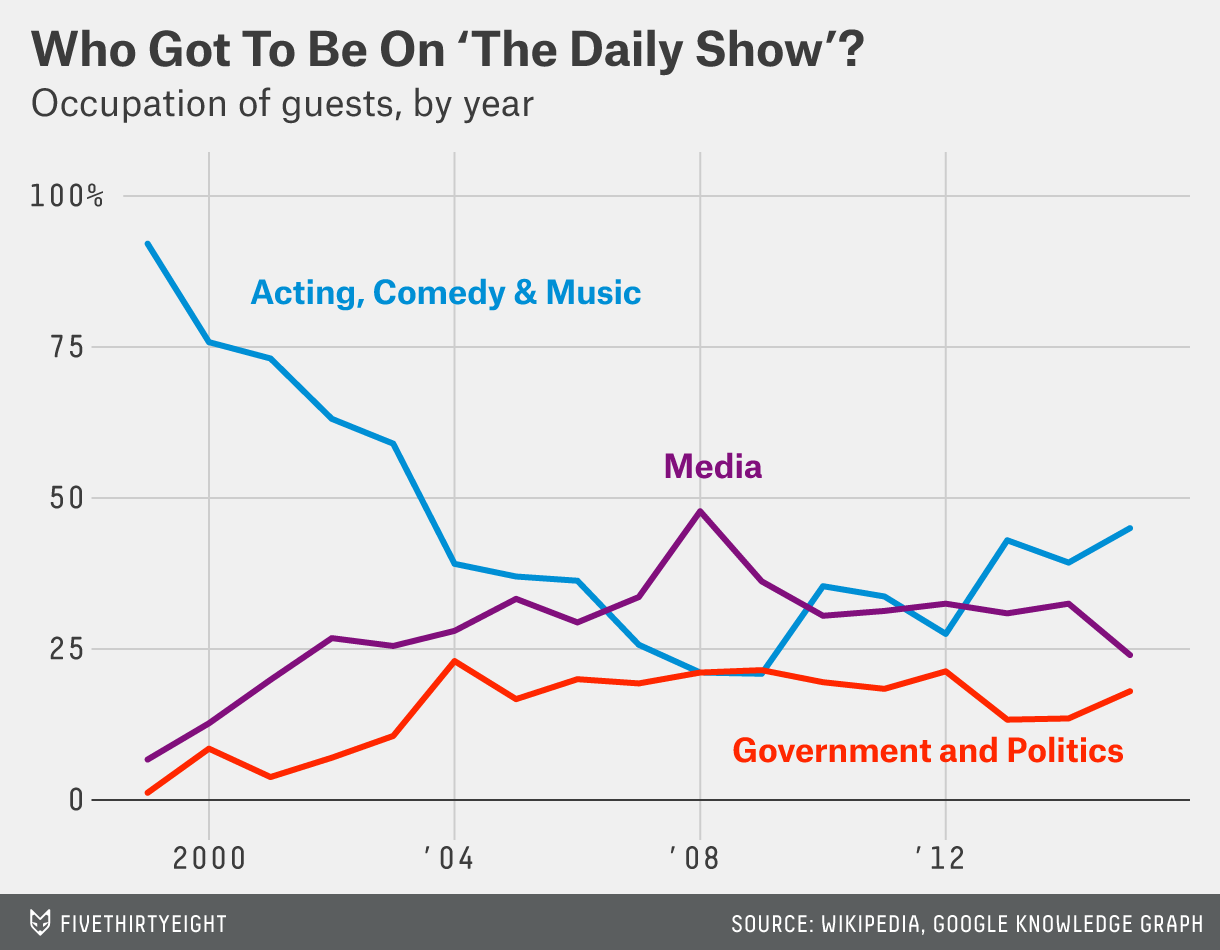

In [146]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

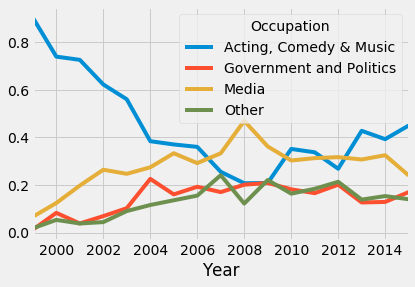

In [147]:
plt.style.use('fivethirtyeight')
data = pd.crosstab(df['Year'], df['Occupation'], normalize='index')
data.plot();

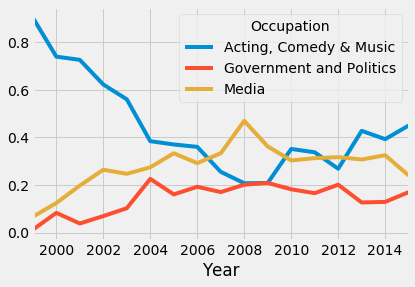

In [148]:
# We don't want Other, so we have to drop it
data = data.drop(columns=['Other'])
data.plot()

Text(1998, 1.0, 'Occupation of guests by year')

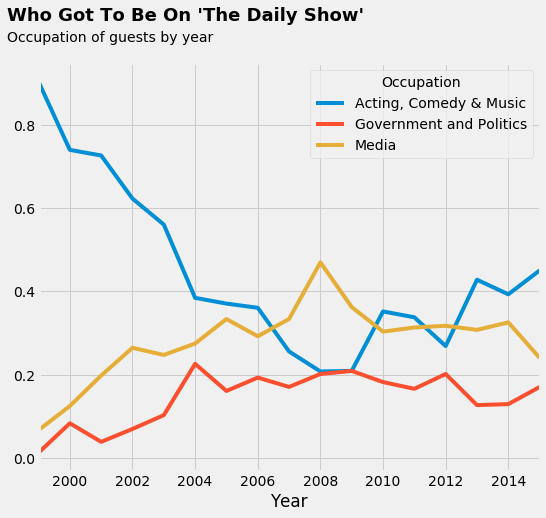

In [149]:
# Now let's get the aesthetics and annotation right
data.plot(figsize=(8,7))
plt.text(x=1998, 
         y=1.05, 
         fontsize=18,
         fontweight='bold',
         s="Who Got To Be On 'The Daily Show'")

plt.text(x=1998, 
         y=1.0, 
         fontsize=14,
         s="Occupation of guests by year")

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)